In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
mob_data = pd.read_csv("../datasets/joined_mobdata.zip", compression='zip')
mob_data.tid = pd.to_datetime(mob_data.tid)

mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678613 entries, 0 to 678612
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             678613 non-null  int64         
 1   tid                    678613 non-null  datetime64[ns]
 2   hastighet_ned          678613 non-null  float64       
 3   hastighet_opp          678613 non-null  float64       
 4   lengdegrad             678613 non-null  float64       
 5   breddegrad             678613 non-null  float64       
 6   klient_type            678613 non-null  object        
 7   teknologi              678047 non-null  object        
 8   ip_as_name             675039 non-null  object        
 9   nettverkstype          678613 non-null  int64         
 10  landkode               675056 non-null  object        
 11  land_geoip             678613 non-null  object        
 12  tilbyder               177211 non-null  obje

In [3]:
#number of 4G measurment per municipality
mob_data[mob_data['teknologi'] == '4G'].groupby(by='navn').count()['hastighet_ned'].sort_values(ascending=False)

navn
Oslo            5405
Kristiansand    2843
Eigersund       2225
Trondheim       2169
Bergen          1841
                ... 
Vardø              5
Vevelstad          4
Berlevåg           2
Værøy              2
Røst               1
Name: hastighet_ned, Length: 353, dtype: int64

In [4]:
mob_data.describe()


,Unnamed: 0,hastighet_ned,hastighet_opp,lengdegrad,breddegrad,nettverkstype,public_ip_asn,num_threads_requested,num_threads,ping_median,index_right,kommunenummer
count,678613.000000,678613.000000,678613.000000,678613.000000,678613.000000,678613.00000,675282.000000,678613.0,678613.000000,678613.000000,678613.000000,678613.000000
mean,351013.785396,82.617225,64.599715,10.029078,61.143050,87.70730,21336.425128,5.0,4.775748,34.530001,194.810985,3331.527984
std,201291.179666,104.286072,100.800869,3.274686,2.790455,29.02978,33576.462293,0.0,0.920173,78.456255,100.332240,1416.177557
min,0.000000,0.001000,0.001000,4.630729,57.959661,1.00000,109.000000,5.0,1.000000,1.073960,1.000000,301.000000
25%,176590.000000,14.080000,6.701000,8.071105,59.448699,99.00000,2119.000000,5.0,5.000000,10.720005,126.000000,3005.000000
50%,352700.000000,41.689000,23.531000,10.406177,60.176102,99.00000,12929.000000,5.0,5.000000,19.018711,196.000000,3419.000000
75%,524961.000000,101.555000,71.129000,11.017995,62.128468,99.00000,29695.000000,5.0,5.000000,36.110311,279.000000,4601.000000
max,698915.000000,1005.779000,937.084000,31.116282,71.170112,107.00000,396362.000000,5.0,5.000000,3364.860330,362.000000,5444.000000


In [5]:
trd_data = mob_data[mob_data.navn == 'Trondheim']
trd_data['teknologi'].value_counts()

WLAN    19337
4G       2169
5G        139
2G         29
3G         22
Name: teknologi, dtype: int64

In [6]:
trd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21717 entries, 13 to 678603
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             21717 non-null  int64         
 1   tid                    21717 non-null  datetime64[ns]
 2   hastighet_ned          21717 non-null  float64       
 3   hastighet_opp          21717 non-null  float64       
 4   lengdegrad             21717 non-null  float64       
 5   breddegrad             21717 non-null  float64       
 6   klient_type            21717 non-null  object        
 7   teknologi              21696 non-null  object        
 8   ip_as_name             21618 non-null  object        
 9   nettverkstype          21717 non-null  int64         
 10  landkode               21616 non-null  object        
 11  land_geoip             21717 non-null  object        
 12  tilbyder               7384 non-null   object        
 13 

In [7]:
import seaborn as sns

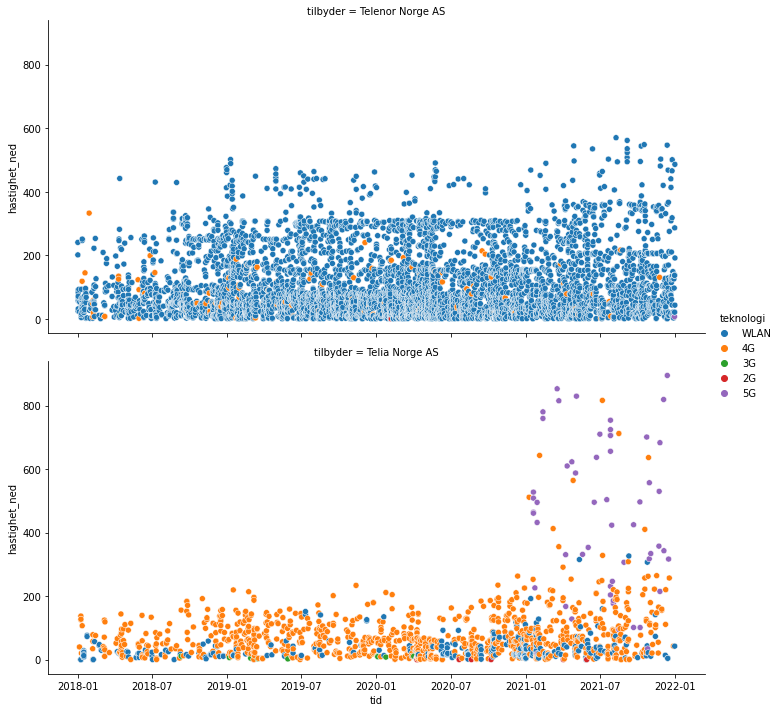

In [8]:
dt_res = trd_data.resample('W', on='tid')
med_res = dt_res.median()
mean_res = dt_res.mean()
sns.relplot(data =trd_data,x='tid', y="hastighet_ned", hue="teknologi", kind="scatter", row='tilbyder', aspect=2);


In [9]:
trd_data['tilbyder'].value_counts()

Telenor Norge AS    5946
Telia Norge AS      1438
Name: tilbyder, dtype: int64

In [10]:
mob_data['tilbyder'].value_counts()

Telenor Norge AS    126701
Telia Norge AS       50510
Name: tilbyder, dtype: int64

In [11]:
mob_data['operator_name'].value_counts()

Telenor                37527
Telia N                26921
N Telenor               3461
TELENOR                 2490
One Call                1719
                       ...  
N Telenor | Telia N        1
MCP                        1
Telio                      1
Telia | Telia N            1
One Call,Lycamobile        1
Name: operator_name, Length: 77, dtype: int64

In [12]:
dat_4G = mob_data[mob_data.teknologi == '4G']

In [13]:
dat_4G['operator_name'].value_counts()

Telenor                36041
Telia N                25489
N Telenor               3322
TELENOR                 2355
One Call                1656
                       ...  
TeliaDK | Telia N          1
MCP                        1
Telio                      1
Telia | Telia N            1
One Call,Lycamobile        1
Name: operator_name, Length: 74, dtype: int64

In [14]:
dat_4G['sim_operator_name'].value_counts()

Telenor                36041
Telia N                25489
N Telenor               3322
TELENOR                 2355
One Call                1656
                       ...  
TeliaDK | Telia N          1
MCP                        1
Telio                      1
Telia | Telia N            1
One Call,Lycamobile        1
Name: sim_operator_name, Length: 74, dtype: int64

In [15]:
d4f = dat_4G.dropna(axis=0, subset=['tilbyder'])

In [16]:
d4f = d4f[['tilbyder', 'sim_operator_name','operator_name']]

In [17]:
d4f.sim_operator_name.value_counts()

Telia N                       24648
Telenor                        3446
One Call                       1607
Chilimobil                     1438
OneCall                        1399
Chess                           526
N Telenor                       306
NetCom                          267
Talkmore                        172
MyCall                          137
Fjordkraft                       91
TELENOR                          80
Telipol                          53
SPONZ                            47
NextGenTel                       45
Telenor Maritime                 37
Telenor SE | Telenor             32
GE Mobil                         29
Komplett Mobil                   28
Carrier                          26
SAGA MOBIL                       23
Happybytes                       18
Vipps                            15
Dipper                           14
Ice Norway                       14
N NetCom                         13
Telia                            12
Telenor Maritime | Telenor  

In [18]:
trd_4G = trd_data[trd_data.teknologi == '4G']
trd_4G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 188 to 678585
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2169 non-null   int64         
 1   tid                    2169 non-null   datetime64[ns]
 2   hastighet_ned          2169 non-null   float64       
 3   hastighet_opp          2169 non-null   float64       
 4   lengdegrad             2169 non-null   float64       
 5   breddegrad             2169 non-null   float64       
 6   klient_type            2169 non-null   object        
 7   teknologi              2169 non-null   object        
 8   ip_as_name             2151 non-null   object        
 9   nettverkstype          2169 non-null   int64         
 10  landkode               2151 non-null   object        
 11  land_geoip             2169 non-null   object        
 12  tilbyder               1119 non-null   object        
 13 

/Users/jesper/master/master_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 13.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/jesper/master/master_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 5.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/jesper/master/master_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 196.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/jesper/master/master_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 5001.0 results in singular transformations; automatically exp

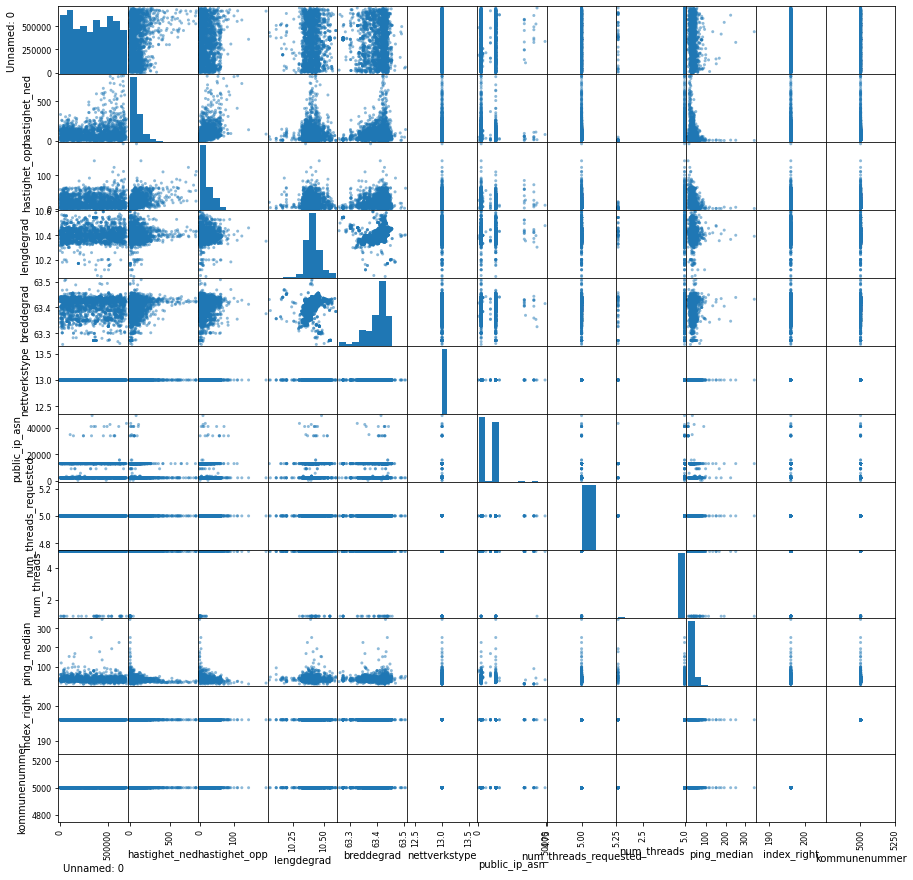

In [19]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(trd_4G, figsize=(15,15))
plt.show()

In [20]:
trd_4G.index = trd_4G.tid
trd_4G_20 = trd_4G.loc['2020']
count = trd_4G_20['hastighet_ned'].resample('D').count()
means = trd_4G_20[['hastighet_ned', 'hastighet_opp', 'ping_median']].resample('D').mean()
median = trd_4G_20[['hastighet_ned', 'hastighet_opp', 'ping_median']].resample('D').median()

In [21]:
mean_count_h = pd.concat([count, means] ,axis =1).fillna(0,axis=0)
mean_count_h.columns = ['count_meas', 'avg_down', 'avg_up', 'avg_ping']
mean_count_h

,count_meas,avg_down,avg_up,avg_ping
tid,,,,
2020-01-02,1,59.962000,16.667000,26.942091
2020-01-03,1,10.980000,0.291000,38.952489
2020-01-04,6,70.875000,27.254167,27.555391
2020-01-05,2,95.933000,26.783500,32.506965
2020-01-06,1,8.501000,0.654000,56.365825
...,...,...,...,...
2020-12-26,2,106.539500,11.956000,30.486176
2020-12-27,7,44.029571,11.552286,30.237224
2020-12-28,5,63.639200,14.777800,36.422463


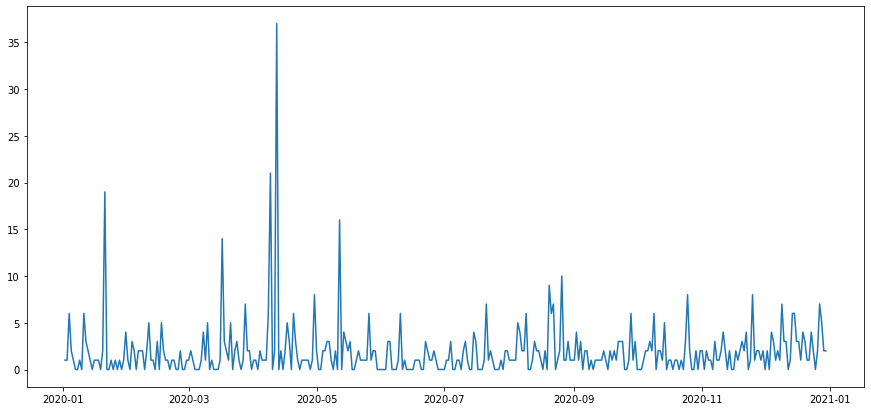

In [22]:
import matplotlib.pyplot as plt

fig, axs  = plt.subplots(figsize = (15,7))
axs.plot(mean_count_h.index , mean_count_h.count_meas)
#axs.plot(mean_count_h.index , mean_count_h.avg_down)

In [23]:
mean_count_h.sort_values(by="count_meas", ascending=False).head(15)

,count_meas,avg_down,avg_up,avg_ping
tid,,,,
2020-04-12,37,29.989730,9.732730,36.096885
2020-04-09,21,92.032952,29.418000,24.161887
2020-01-21,19,115.480526,38.704000,34.198935
2020-05-12,16,14.069250,3.509000,36.463639
2020-03-17,14,83.445429,20.337714,32.016693
2020-08-26,10,150.364600,33.210200,32.407123
2020-08-20,9,73.688556,40.167333,25.256952
2020-10-25,8,186.229375,14.430000,28.808370
2020-11-25,8,53.495000,13.568375,32.603906


In [24]:
clust_feat = mob_data[['navn', 'hastighet_ned', 'hastighet_opp', 'ping_median']]

In [25]:
kommune_median_ft = clust_feat.groupby(by = 'navn').median() 
komm_count = clust_feat.groupby(by = 'navn').count()['hastighet_ned'] 
kommune_median_ft = kommune_median_ft.join(komm_count, how='left', rsuffix='_count')
kommune_median_ft.sort_values('hastighet_ned_count')

,hastighet_ned,hastighet_opp,ping_median,hastighet_ned_count
navn,,,,
Utsira,31.477,25.8370,23.633348,4
Værøy,38.995,59.6120,20.706901,7
Vardø,46.155,24.8345,52.899138,10
Modalen,81.358,36.4445,22.506977,10
Loppa,32.782,9.9900,52.061556,13
...,...,...,...,...
Bærum,61.348,27.3930,11.983747,11131
Trondheim,69.862,28.7830,16.572434,21717
Kristiansand,54.223,39.0680,13.146689,22837


In [26]:
# removing all kommunes with 100< measurments
kommune_median_ft = kommune_median_ft[kommune_median_ft.hastighet_ned_count > 100]
kommune_median_ft.drop('hastighet_ned_count', axis=1, inplace=True)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import numpy as np

In [28]:
prep_pipe = Pipeline([
    ("Scaler", RobustScaler()), 
    ("Decomposition", PCA(n_components= 2))
])

In [29]:
preped_dt = pd.DataFrame(prep_pipe.fit_transform(kommune_median_ft), index=kommune_median_ft.index)


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7 ,8 , 9, 10, 11, 12, 13]

def plot_kmeans_silhouette_scores(preped_dt, range_n_clusters):
    silhouette_avgs =[]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(preped_dt) + (n_clusters + 1) * 10])


        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=3)
        cluster_labels = clusterer.fit_predict(preped_dt)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        s_avg =  silhouette_score(preped_dt, cluster_labels)
        silhouette_avgs.append(s_avg)


          # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(preped_dt, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=s_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            preped_dt.values[:, 0], preped_dt.values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

    plt.plot(range_n_clusters, silhouette_avgs )

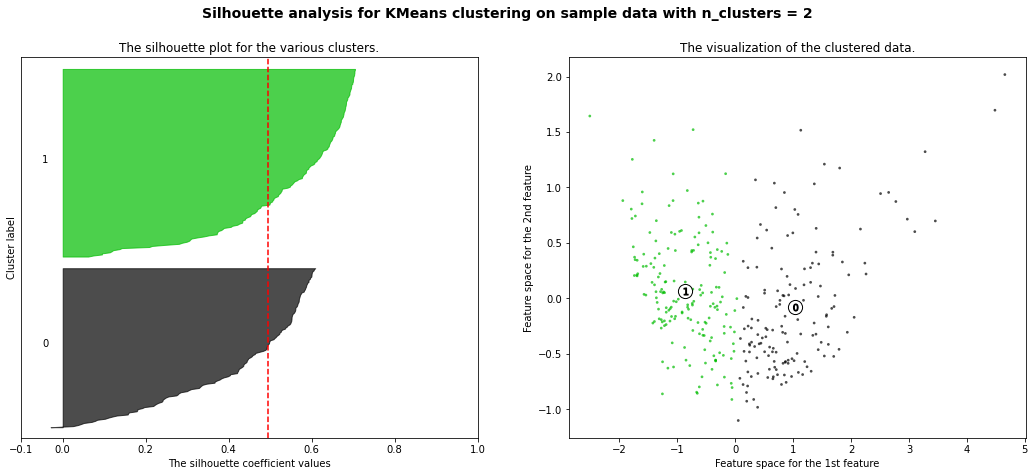

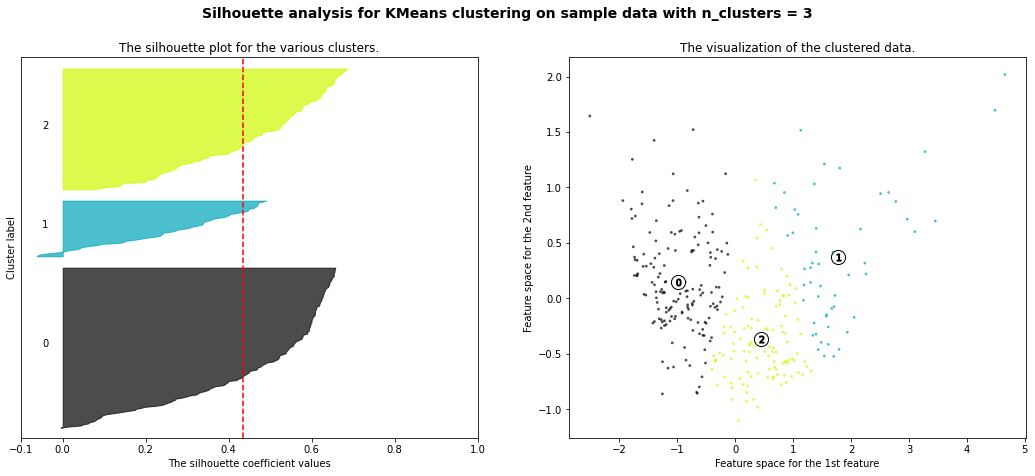

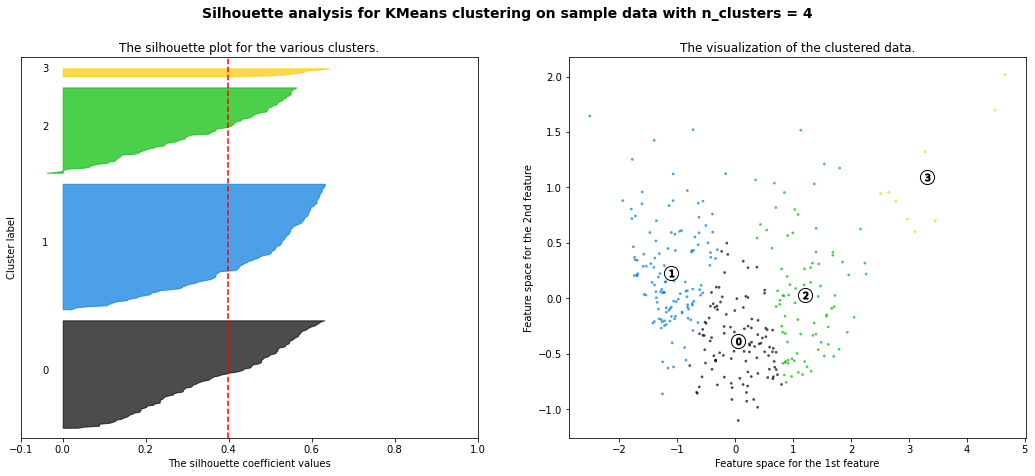

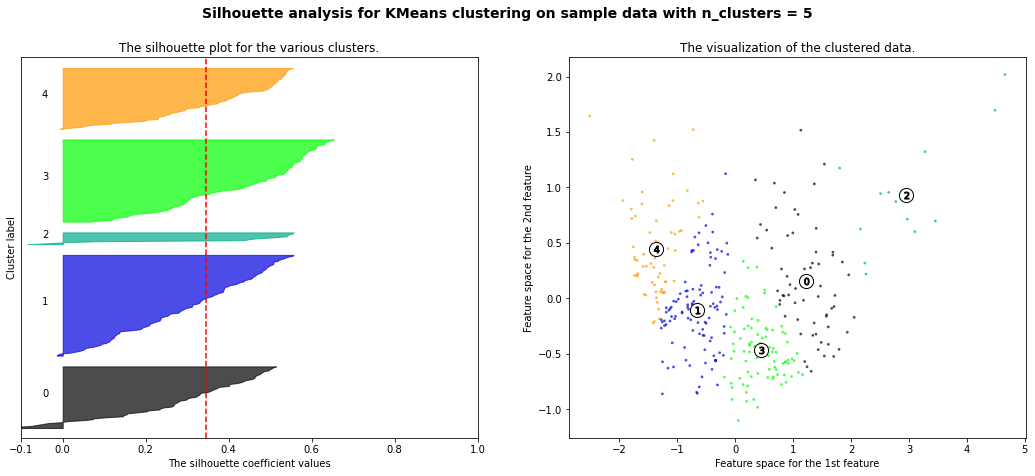

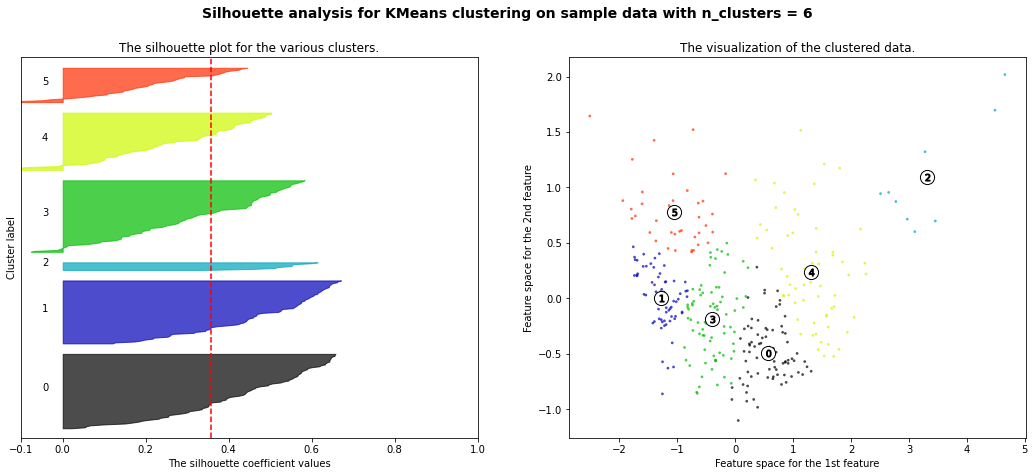

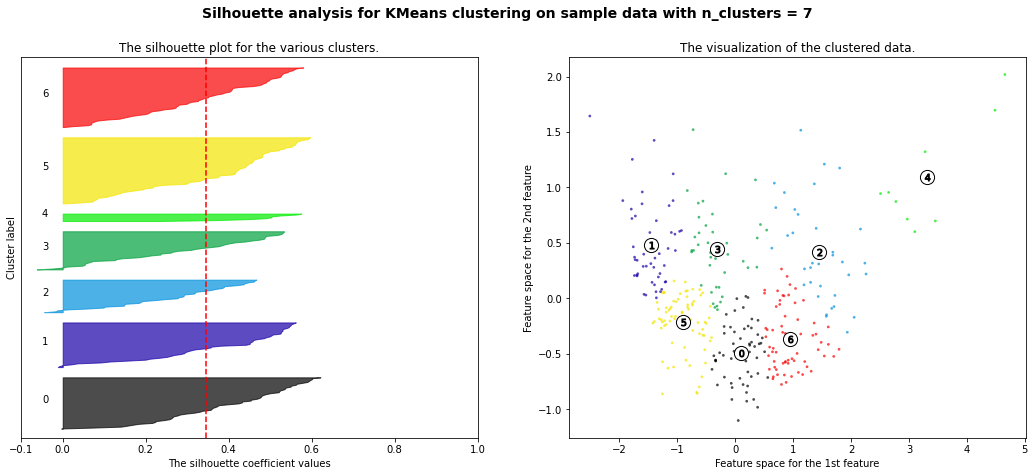

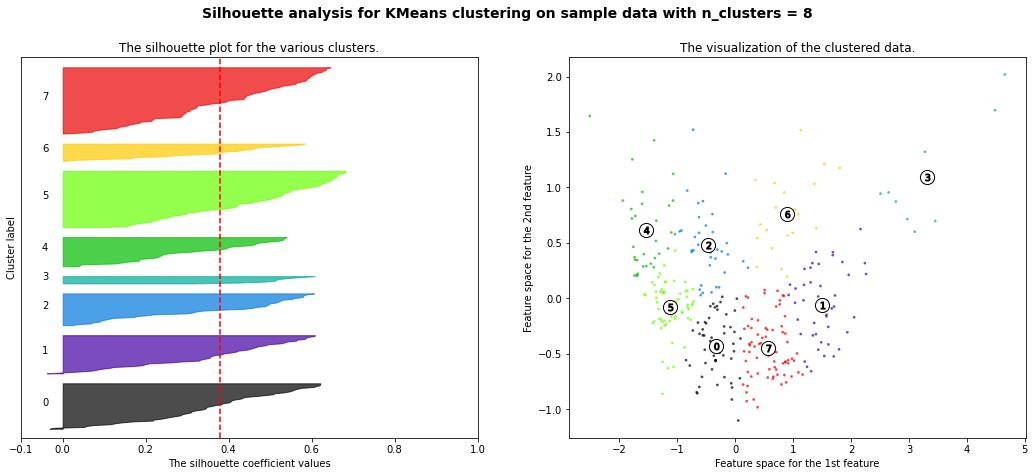

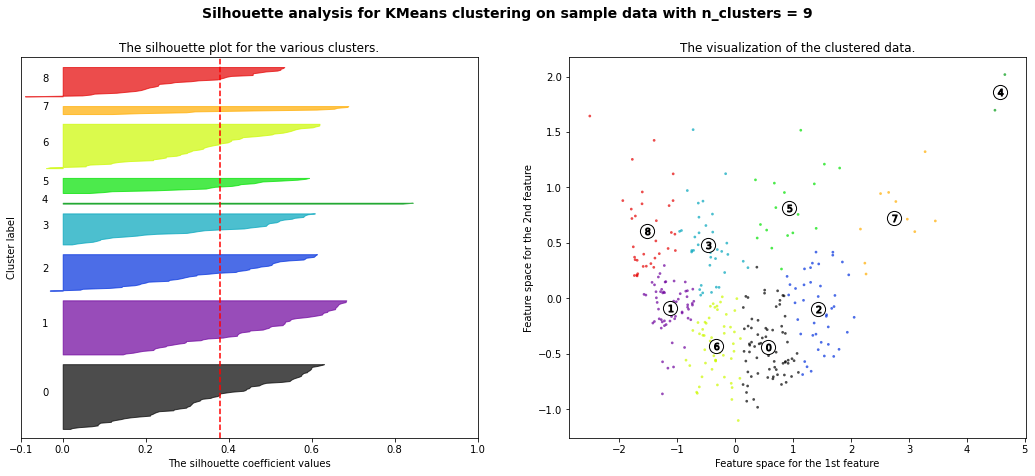

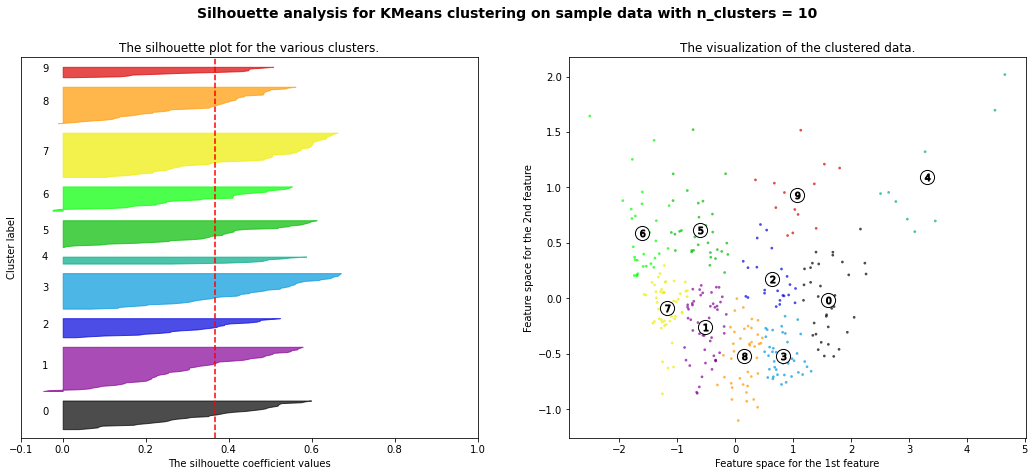

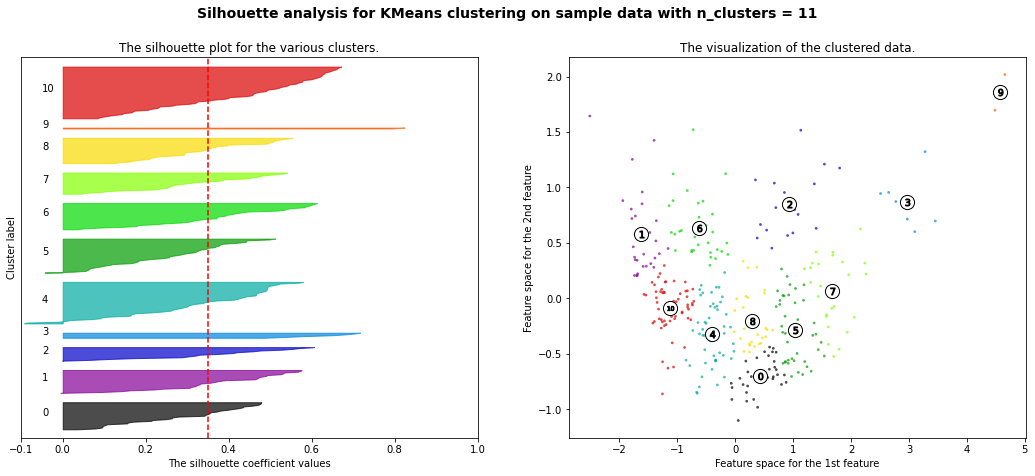

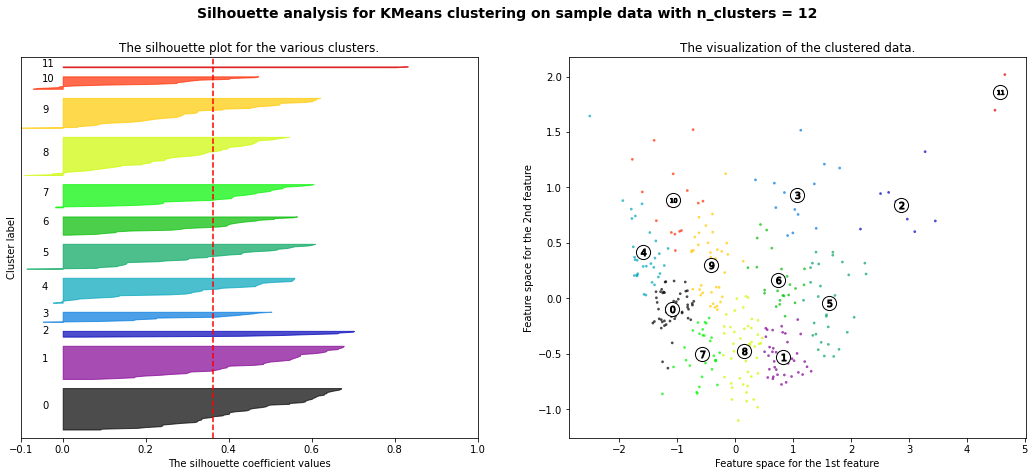

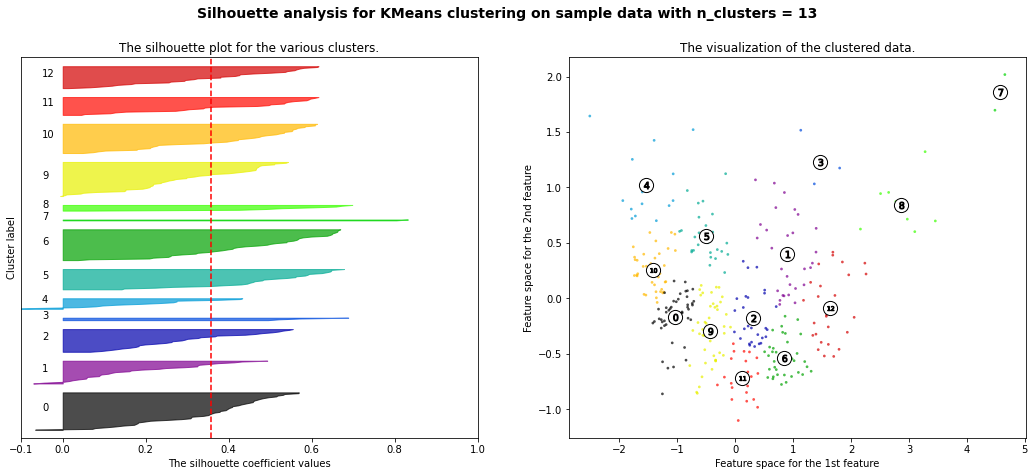

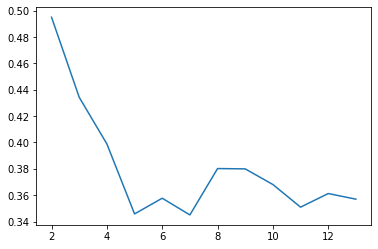

In [32]:
range_n_clusters = [2, 3, 4, 5, 6, 7 ,8 , 9, 10, 11, 12, 13]
plot_kmeans_silhouette_scores(preped_dt, range_n_clusters)

In [33]:
# choosing 5 clusters as seen above
clusterer = KMeans(n_clusters= 6, init='k-means++', n_init=3)
cluster_labels = clusterer.fit_predict(preped_dt)

cluster_labels

array([2, 5, 1, 1, 5, 1, 2, 4, 3, 5, 4, 4, 2, 4, 5, 3, 5, 2, 4, 2, 1, 2,
       3, 2, 2, 2, 4, 4, 4, 4, 2, 5, 4, 3, 2, 3, 2, 5, 4, 3, 3, 1, 5, 2,
       5, 2, 3, 3, 2, 1, 2, 2, 2, 0, 5, 4, 3, 0, 3, 3, 2, 5, 3, 3, 5, 4,
       1, 3, 3, 2, 5, 2, 0, 2, 4, 3, 3, 3, 5, 5, 5, 1, 4, 1, 5, 2, 1, 2,
       3, 3, 1, 4, 1, 3, 5, 2, 2, 4, 2, 2, 2, 5, 3, 3, 3, 3, 2, 5, 5, 5,
       5, 3, 5, 4, 2, 1, 5, 2, 5, 0, 5, 1, 4, 5, 3, 4, 2, 5, 3, 5, 5, 5,
       5, 4, 5, 1, 2, 2, 3, 2, 1, 3, 3, 3, 4, 3, 3, 3, 3, 5, 2, 1, 4, 5,
       4, 4, 4, 3, 2, 4, 5, 3, 2, 2, 3, 5, 5, 3, 4, 3, 2, 2, 5, 2, 4, 3,
       2, 2, 3, 5, 4, 2, 2, 2, 5, 1, 3, 3, 1, 5, 4, 1, 3, 5, 2, 2, 3, 0,
       5, 1, 3, 0, 2, 1, 4, 4, 5, 2, 5, 5, 5, 5, 5, 2, 5, 3, 1, 5, 2, 5,
       3, 1, 4, 3, 3, 4, 3, 2, 5, 1, 5, 4, 3, 5, 3, 2, 4, 5, 2, 3, 2, 3,
       2, 1, 5, 4, 3, 2, 3, 3, 2, 3, 2, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4,
       5, 2, 5, 2, 2, 4, 4, 2, 5, 5, 2, 4, 4, 2, 1, 3, 5, 0, 5, 4, 3, 3,
       5, 4, 2, 1, 2, 1, 5, 0, 1, 2, 5, 3, 5, 3, 0,

In [34]:
kommune_median_ft['km_lables'] = cluster_labels

In [35]:
kommune_median_ft

,hastighet_ned,hastighet_opp,ping_median,km_lables
navn,,,,
Aarborte,10.4660,4.2210,43.800800,2
Alstahaug,31.1045,14.8325,30.925925,5
Alta,27.3470,18.4700,36.444460,1
Alvdal,50.6535,29.7545,27.115360,1
Alver,27.2355,12.5105,29.994414,5
...,...,...,...,...
Østre Toten,18.0985,10.2900,22.119507,5
Øvre Eiker,45.4460,44.0150,7.590059,3
Øyer,24.6940,15.3110,19.056184,5


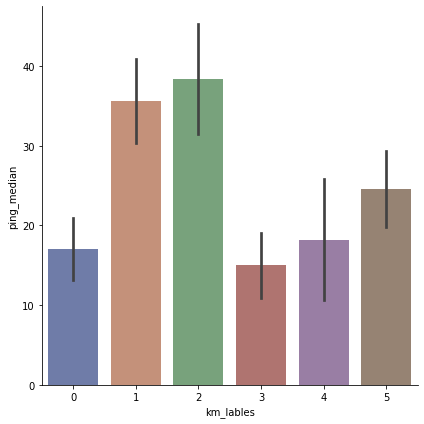

In [36]:
g = sns.catplot(
    data=kommune_median_ft, kind="bar",
    x="km_lables", y="ping_median",
    ci='sd', palette="dark", alpha=.6, height=6
)

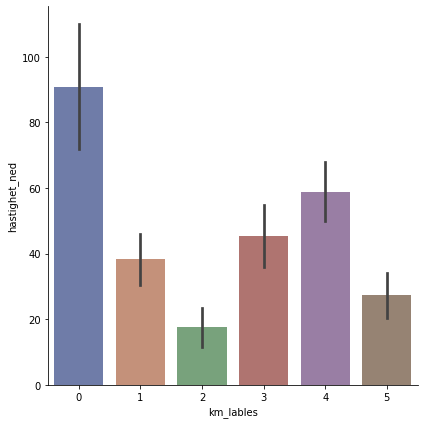

In [37]:
g = sns.catplot(
    data=kommune_median_ft, kind="bar",
    x="km_lables", y="hastighet_ned",
    ci='sd', palette="dark", alpha=.6, height=6
)

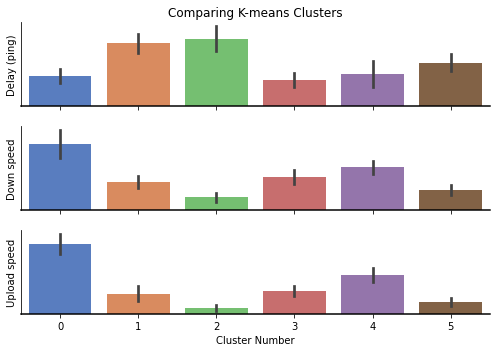

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

sns.barplot(
    data=kommune_median_ft,
    x="km_lables", y="ping_median",
    ci='sd', palette="muted", ax=ax1, 
)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Delay (ping)")
ax1.set_xlabel(None)
ax1.set_title("Comparing K-means Clusters")

sns.barplot(
    data=kommune_median_ft,
    x="km_lables", y="hastighet_ned",
    ci='sd', palette="muted", ax=ax2
)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Down speed")
ax2.set_xlabel(None)



sns.barplot(
    data=kommune_median_ft,
    x="km_lables", y="hastighet_opp",
    ci='sd', palette="muted", ax=ax3
)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Upload speed")
ax3.set_xlabel("Cluster Number")


sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

Look for spatial distribution

<AxesSubplot:>

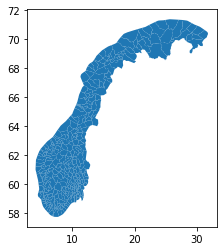

In [39]:
# import spatial data
file_path = "Test/Norge_25833_Kommuner_GeoJSON.zip"
kommuner_gdf= gpd.read_file(file_path, layer= 'administrative_enheter.kommune', compression='zip')
kommuner_gdf = kommuner_gdf[['navn', 'kommunenummer', 'geometry']]
kommuner_gdf = kommuner_gdf.to_crs(epsg=4326)
kommuner_gdf.plot()

In [40]:
# Extract name of kommune
import json

extract_name= lambda s: json.loads(s)[0]['navn']

kommuner_gdf.navn = kommuner_gdf['navn'].apply(extract_name)


In [41]:
# drop duplicates

kommuner_gdf = kommuner_gdf.drop_duplicates(subset='navn', keep='first')

In [42]:
kommuner_med_gdf = kommuner_gdf.merge(kommune_median_ft ,on='navn', how ='right')
kommuner_med_gdf

,navn,kommunenummer,geometry,hastighet_ned,hastighet_opp,ping_median,km_lables
0,Aarborte,1826,"POLYGON ((13.82300 65.45053, 13.82294 65.44944...",10.4660,4.2210,43.800800,2
1,Alstahaug,1820,"POLYGON ((12.07128 65.86653, 12.13618 65.84325...",31.1045,14.8325,30.925925,5
2,Alta,5403,"POLYGON ((22.26609 70.07878, 22.26625 70.06343...",27.3470,18.4700,36.444460,1
3,Alvdal,3428,"POLYGON ((10.15431 62.02570, 10.14225 62.00886...",50.6535,29.7545,27.115360,1
4,Alver,4631,"POLYGON ((4.77670 60.73394, 4.89788 60.63189, ...",27.2355,12.5105,29.994414,5
...,...,...,...,...,...,...,...
324,Østre Toten,3442,"POLYGON ((10.68199 60.57691, 10.68170 60.57572...",18.0985,10.2900,22.119507,5
325,Øvre Eiker,3048,"POLYGON ((9.71327 59.76109, 9.71330 59.76033, ...",45.4460,44.0150,7.590059,3
326,Øyer,3440,"POLYGON ((10.20633 61.33366, 10.20664 61.33217...",24.6940,15.3110,19.056184,5
327,Øygarden,4626,"POLYGON ((4.41774 60.41258, 4.42736 60.39494, ...",69.8270,55.5800,17.186668,4


<AxesSubplot:>

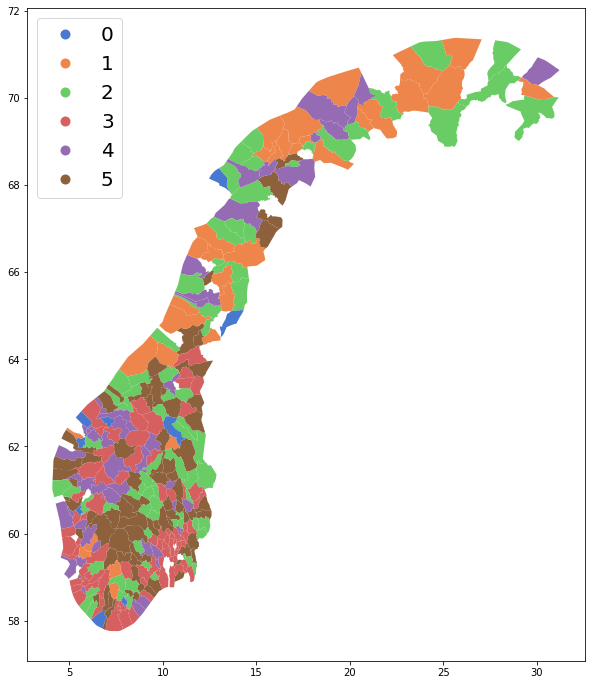

In [43]:
import matplotlib
my_cmap = matplotlib.colors.ListedColormap(sns.color_palette('muted', as_cmap=True), N=6)
kommuner_med_gdf.plot(column='km_lables', legend=True, categorical=True, figsize= (10,15), k=6, cmap = my_cmap, legend_kwds= {'loc':2, 'prop':{'size': 20}})

In [44]:
sns.color_palette("dark", as_cmap=True)

['#001C7F',
 '#B1400D',
 '#12711C',
 '#8C0800',
 '#591E71',
 '#592F0D',
 '#A23582',
 '#3C3C3C',
 '#B8850A',
 '#006374']